In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y


array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
#RandomForestClassifier

In [7]:

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF train roc-auc: 0.9999602033506738
RF test roc-auc: 0.9766500000000001


In [8]:
ytrain_pred

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8]])

In [ ]:
#LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


In [ ]:
#AdaBoostClassifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [12]:
# KNNClassifier

In [13]:

from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [14]:
#No we will focus on selecting the best threshold for maximum accuracy

In [15]:

pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9846444444444445


In [16]:
pd.concat(pred,axis=1)


,0,1,2,3
0,1.0,0.991869,0.559186,1.0
1,0.0,0.000008,0.463282,0.0
2,1.0,0.966761,0.538202,0.8
3,1.0,0.761461,0.509875,0.8
4,0.6,0.777991,0.490344,0.4
5,0.1,0.542391,0.492548,0.6
6,1.0,0.977743,0.537171,1.0
7,0.9,0.960890,0.552570,0.8
8,1.0,0.993595,0.537610,1.0
9,0.7,0.504627,0.510507,0.6


In [17]:

#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91424695, 0.91424695, 0.91156638, 0.91077267, 0.81941218,
       0.81907151, 0.7937895 , 0.79320261, 0.78965801, 0.78782624,
       0.7817262 , 0.780555  , 0.73875837, 0.73849235, 0.67979186,
       0.67718131, 0.67085994, 0.6687815 , 0.65474627, 0.64762509,
       0.64634583, 0.64222851, 0.62875922, 0.5836407 , 0.55973191,
       0.55365575, 0.54793569, 0.54370183, 0.54296766, 0.53380786,
       0.51022617, 0.50701661, 0.47823121, 0.4598282 , 0.43342204,
       0.34602744, 0.33553337, 0.22196586, 0.22112022, 0.21880349,
       0.21815777, 0.19145056, 0.19096876, 0.11794908, 0.11783509,
       0.10498954])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
34,0.433422,0.961667
33,0.459828,0.960000
32,0.478231,0.960000
31,0.507017,0.956667
29,0.533808,0.956667


In [19]:

accuracy_ls

,thresholds,accuracy
34,0.433422,0.961667
33,0.459828,0.960000
32,0.478231,0.960000
31,0.507017,0.956667
29,0.533808,0.956667
27,0.543702,0.956667
30,0.510226,0.955000
28,0.542968,0.955000
26,0.547936,0.955000
25,0.553656,0.955000


In [20]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

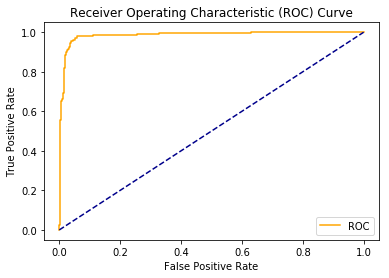

In [21]:
plot_roc_curve(fpr,tpr)